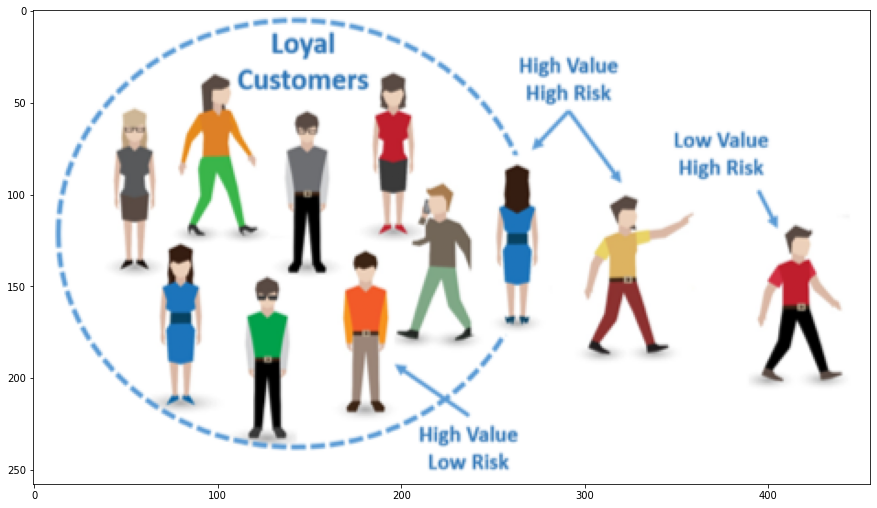

In [1]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
plt.imshow(plt.imread("../input/customer1/customer1.png"))

## Content
1. [Introduction section](#1)
2. [Exploratory Data Analysis and Data Preprocessing](#2)
3. [Data Visualization](#3)
4. [Data Preprocessing](#4) 
4. [Training Machine Learning Models and Model Performance Evaluation](#5)


<a id="1"></a> <br>
# 1. Introduction

<font color="blue">
    
Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.


To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few.

As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy.

<iframe src="https://www.kaggle.com/embed/bhartiprasad17/customer-churn-prediction?cellIds=1&kernelSessionId=67014939" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="CUSTOMER CHURN PREDICTION 📈"></iframe>

In [2]:
import seaborn as sns
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## 2. Exploratory Data Analysis and Data Preprocessing

In [3]:
df = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()
# There are only 3 columns with numerical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<font color="blue">
Columns "TotalCharges" seems string although it has numerical, I will change data type from object into float64

In [5]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<font color="blue">
We need to transform non numerical feature into numerical in order to explore data and make them ready before Machine Learning Algorithm:

In [6]:
df.select_dtypes("object").columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [7]:
#Here I select the nonnumerical columns and print out 
for i in df.select_dtypes("object").columns:
    print(f"Column {i} has these type of data: {df[i].nunique()}")
    print("***************************************************")

Column customerID has these type of data: 7043
***************************************************
Column gender has these type of data: 2
***************************************************
Column Partner has these type of data: 2
***************************************************
Column Dependents has these type of data: 2
***************************************************
Column PhoneService has these type of data: 2
***************************************************
Column MultipleLines has these type of data: 3
***************************************************
Column InternetService has these type of data: 3
***************************************************
Column OnlineSecurity has these type of data: 3
***************************************************
Column OnlineBackup has these type of data: 3
***************************************************
Column DeviceProtection has these type of data: 3
***************************************************
Column TechSupport has

<font color="blue">
Except from customerID column, all of the other columns can be convertible into numerical values because they have 2.+, 3 or 4 different values

In [8]:
#Lets drop customerID column because this column will not affect our target column
df.drop("customerID",axis=1, inplace=True)

<font color="blue">
Here we use pd.get_dummies() function or order to transform categorical columns into dummy numbers


In [9]:
# I will exclude the target column before transforming into numerical dommy varieables
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']
categorical_features


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [10]:
df_latest=pd.get_dummies(data=df,columns=categorical_features,drop_first=True)
df_latest

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,No,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,Yes,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,No,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,Yes,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,No,1,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,No,0,1,1,1,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,No,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,Yes,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [11]:
#I will also transform the target columns "Churns" into numerical column in order to show statistical relation between target and features
df_latest2 = pd.get_dummies(data=df,columns=df.select_dtypes("object").columns,drop_first=False)
df_latest2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [12]:
#Lets get overall statistical information on our features, I will use decribe() function and transpose the result by using transpose() function
df_latest2.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80
gender_Female,7043.0,0.495244,0.500013,0.00,0.00,0.000,1.0000,1.00
gender_Male,7043.0,0.504756,0.500013,0.00,0.00,1.000,1.0000,1.00
Partner_No,7043.0,0.516967,0.499748,0.00,0.00,1.000,1.0000,1.00
Partner_Yes,7043.0,0.483033,0.499748,0.00,0.00,0.000,1.0000,1.00
Dependents_No,7043.0,0.700412,0.458110,0.00,0.00,1.000,1.0000,1.00
Dependents_Yes,7043.0,0.299588,0.458110,0.00,0.00,0.000,1.0000,1.00


In [13]:
df_latest2.corr()[["Churn_Yes","Churn_No"]].sort_values(by="Churn_Yes",ascending=False) 
#Here we can see the correlations between features and churning

,Churn_Yes,Churn_No
Churn_Yes,1.000000,-1.000000
Contract_Month-to-month,0.405103,-0.405103
OnlineSecurity_No,0.342637,-0.342637
TechSupport_No,0.337281,-0.337281
InternetService_Fiber optic,0.308020,-0.308020
PaymentMethod_Electronic check,0.301919,-0.301919
OnlineBackup_No,0.268005,-0.268005
DeviceProtection_No,0.252481,-0.252481
MonthlyCharges,0.193356,-0.193356
PaperlessBilling_Yes,0.191825,-0.191825


<font color="red">
According to these values above and in the figure below,people will be tend to churn if 
    
    1. their contract type is month to month 
    2. there is no online security
    3. there is no technical support to the customer
    4. internet service is fiber optic
    5. payment method is electronic check
    6. there is no online backup
    7. there is no device protection
    8. there is monthly charges
    9. there is paperless billing

<font color="green">
According to these valuues,people will not churn if 
    
    1. there is higher tenure 
    2. there is two years period contract
    3. there is no internet service
    4. there is no streaming TV

<AxesSubplot:>

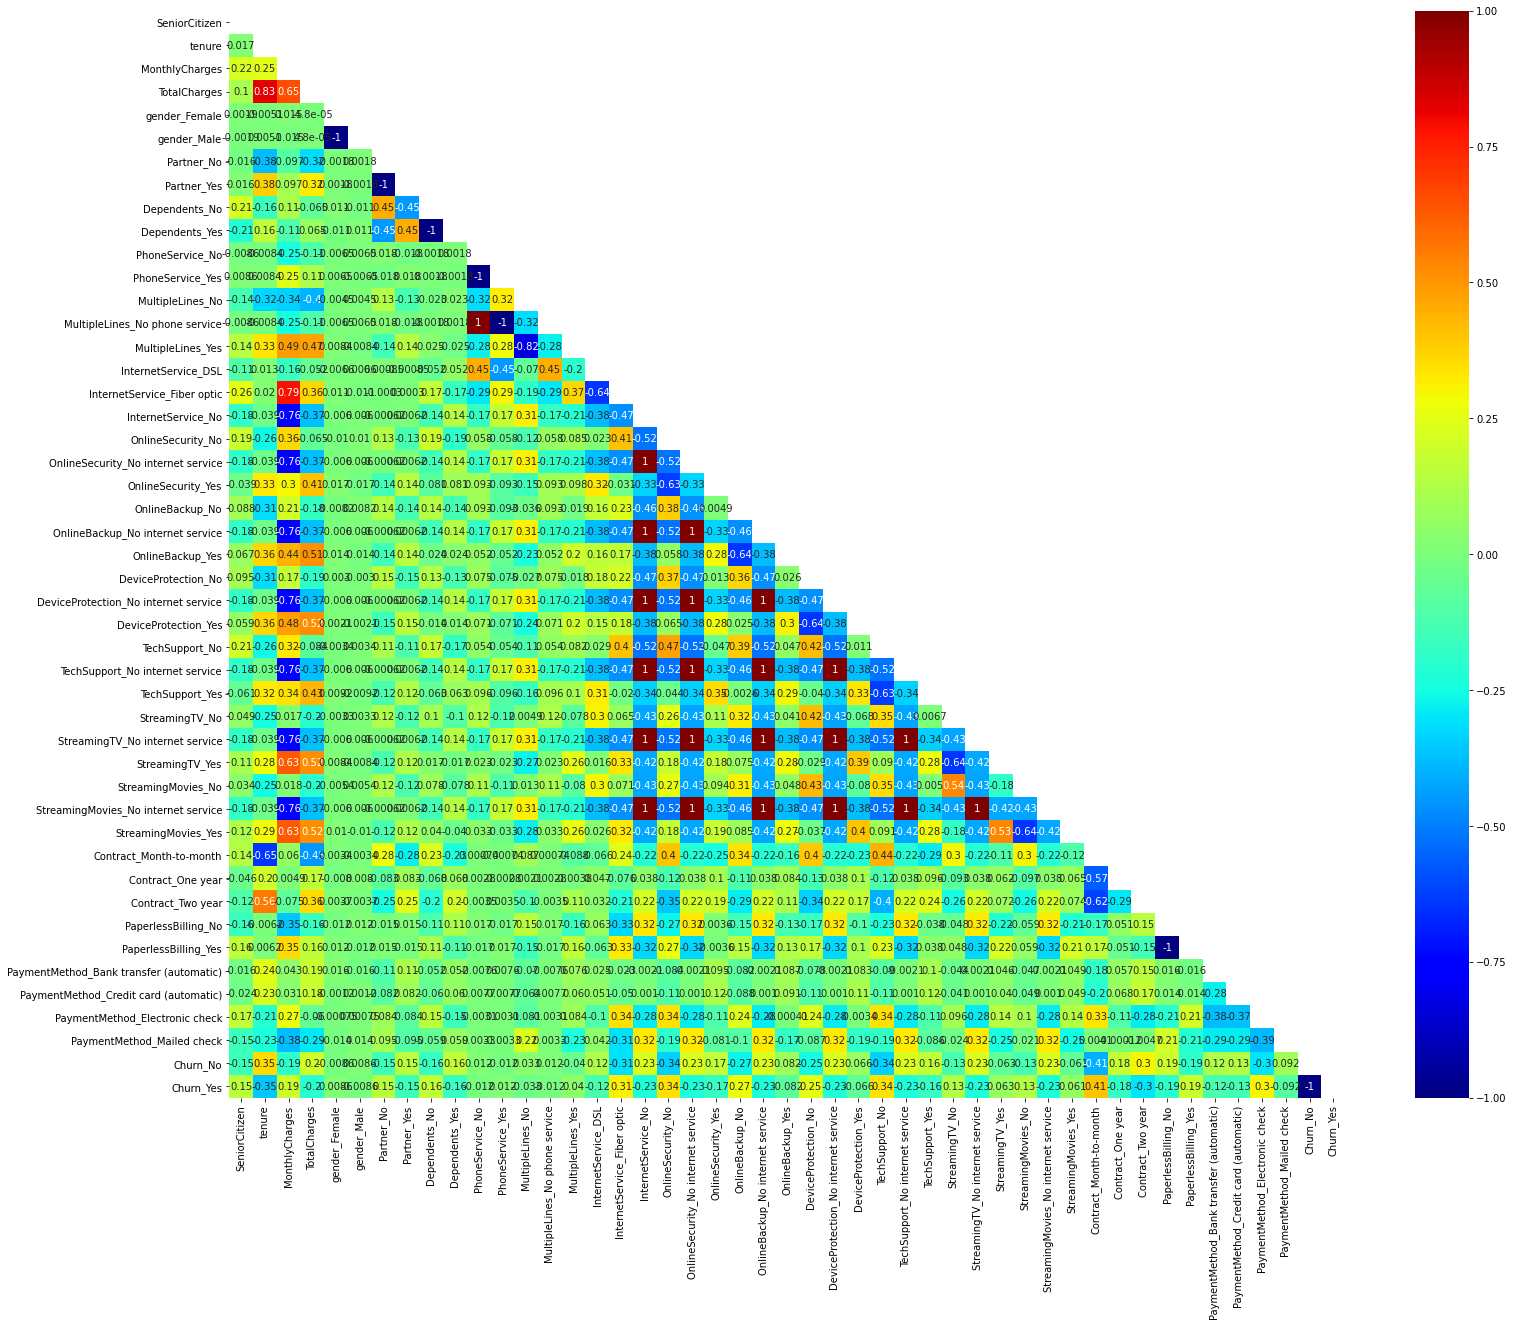

In [14]:
#Lets visualize overall correlations between all columns with each other
plt.figure(figsize=(25,20))
mask = np.zeros_like(df_latest2.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_latest2.corr(),cmap="jet",annot=True,linewidths=0, linecolor='white',cbar=True,mask=mask)

## 3. Data Visualization:

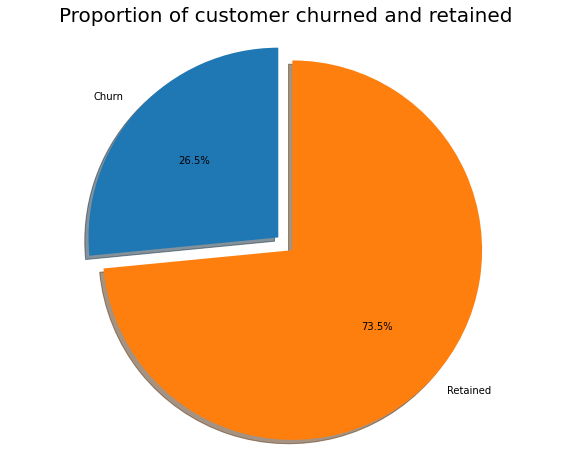

In [15]:
labels = 'Churn', 'Retained'
sizes = [df_latest.Churn[df_latest["Churn"]=="Yes"].count(), df_latest.Churn[df_latest["Churn"]=="No"].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

<font color="green">
So about 26.5% of the customers have churned while  73.5% have retained. So the baseline model could be to predict that 26.5% of the customers will churn. This means that we have unbalanced target which can affect the performance of the machine learning algorithm and its predictions negatively if we do not deal with this issue.

<font color="red">
3.1. Contract Type - Churn Relationship:

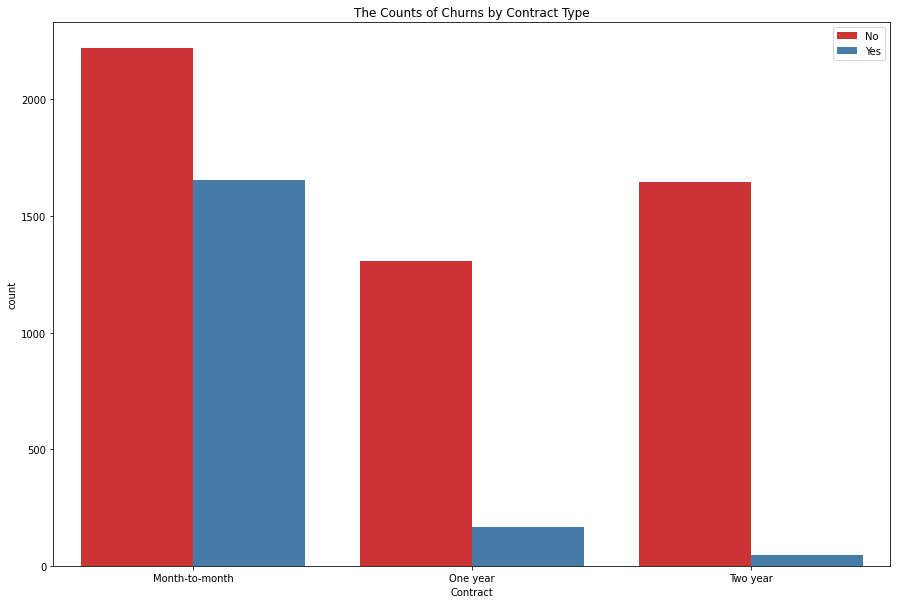

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(x="Contract",hue="Churn", data=df, palette="Set1")
plt.title("The Counts of Churns by Contract Type")
plt.legend()
#There was a positive correlation between Churning and Month-to-Month Contract Type, we can see the proof of this relationship below:

<font color="green">
Almost %40 of month to month contract have churned according to the table above.The percentage is very low when it comes to customers with One Year Contract and and customers with Two Year Contract. Therefore, this firm should focus more on the customers month ot month customer and make campaigns to retain them.


In [17]:
df["Contract"].value_counts()# There are a lot customers with this contract type in this organization that needs to be addresses

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

<font color="red">
3.2. Gender- Churn Relationship:

In [18]:
print(df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count())
print("***************************************")
print(df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count())

gender
Female    2549
Male      2625
Name: Churn, dtype: int64
***************************************
gender
Female    939
Male      930
Name: Churn, dtype: int64


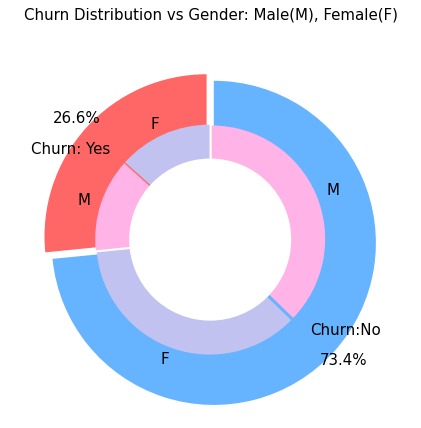

In [19]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution vs Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

<font color="blue">
There is no positive or negative correlation between gender and Churn. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.Therefore,we can say that there is no need to make a special focus on gender type in order retain customers.

<font color="red">
3.3. Payment - Churn Relationship:

In [20]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()


In [21]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution vs Churn</b>")
fig.update_layout(width=900, height=600, bargap=0.1)
fig.show()

<font color="blue">
I have already found that people tend to churn if payment method is electronic ckeck when ckecking correlarion in the previous section.This figure demonstrates that people have higher rate of churn if payment method is electronic check. Therefore, company should deal with more with electronic check payment method and make some precautions.

<font color="red">
3.4. Internet Service - Churn Relationship:

In [22]:
labels = df['InternetService'].unique()
values = df['InternetService'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Internet Service Types Distribution</b>")
fig.show()


In [23]:
fig = px.histogram(df, x="Churn", color="InternetService", title="<b>Internet Service Types distribution vs Churn</b>")
fig.update_layout(width=900, height=600, bargap=0.1)
fig.show()

<font color="blue">
I have already found that people with fiber optic internet service tend to churn. This figure complies with this result. People with no internet service are stable and retain in the company. I think people with faster internet service like fiber optic can reach internet faster and can find find other options that can be better than this company. Hence, this company should make some ads and campaigns in order to attract customers with fiber optic internet service.

<font color="red">
3.5. Dependents - Churn Relationship:

In [24]:
labels = df['Dependents'].unique()
values = df['Dependents'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Dependents Distribution</b>")
fig.show()

In [25]:
color_map = {"Yes": "green", "No": "red"}
fig = px.histogram(df, x="Churn", color="Dependents",title="<b>Dependents distribution vs Churn</b>", color_discrete_map=color_map)
fig.update_layout(width=900, height=600, bargap=0.1)
fig.show()

<font color="green">
The figure above points out that customers without dependents are more likely to churn from the company.

<font color="red">
3.6. Partners - Churn Relationship:

In [26]:
color_map = {"Yes": "orange", "No": "red"}
fig = px.histogram(df, x="Churn", color="Partner",title="<b>Partner distribution vs Churn</b>", color_discrete_map=color_map)
fig.update_layout(width=900, height=600, bargap=0.1)
fig.show()

<font color="green">
The figure shows that customers without partners are more likely to churn. In this sense, this company may prioritize to organize campaigns and ads towards customers without partners in order to retain them in the company.

<font color="red">
3.7. Senior Citizen - Churn Relationship:

In [27]:
color_map = {"Yes": "green", "No": "blue"}
fig = px.histogram(df, x="Churn", color="SeniorCitizen",title="<b>Senior Citizen vs Churn</b>", color_discrete_map=color_map)
fig.update_layout(width=900, height=600, bargap=0.1)
fig.show()

<font color="green">
The figure shows that most of the senior citizens churn, thus senior citizen have very high rate of churn that the company should take of seriously so as to retain them.

<font color="red">
3.8. Online Security - Churn Relationship:

In [28]:
color_map = {"Yes": "purple", "No": "yellow"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity",title="<b>Online Security vs Churn</b>", color_discrete_map=color_map)
fig.update_layout(width=900, height=600, bargap=0.1)
fig.show()

<font color="green">
The figure shows that customers tend to churn if there is no online internet security. Therefore, the more company increase online security in its services, the higher it will retain its customers.

<font color="red">
3.9. Paperless Billing - Churn Relationship:

In [29]:
color_map = {"Yes": "maroon", "No": "aqua"}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",title="<b>Paperless Billing vs Churn</b>", color_discrete_map=color_map)
fig.update_layout(width=900, height=600, bargap=0.1)
fig.show()

<font color="green">
The figure shows that paperless billing is risky for the company, thus it will be a good strategy to send bills in paper form to retain its customers instead of paperless and digital options.

<font color="red">
3.10. Technical Support - Churn Relationship:

In [30]:
color_map = {"Yes": "beige", "No": "brown"}
fig = px.histogram(df, x="Churn", color="TechSupport",title="<b>Technical Support vs Churn</b>", color_discrete_map=color_map)
fig.update_layout(width=900, height=600, bargap=0.1)
fig.show()

<font color="green">
The figure shows that customers without enough technical support will migrate to the other companies. Therefore, we can say that providing enough technical support to the customers is very important for customer retention.

<font color="red">
3.11. Total Charces - Churn Relationship:

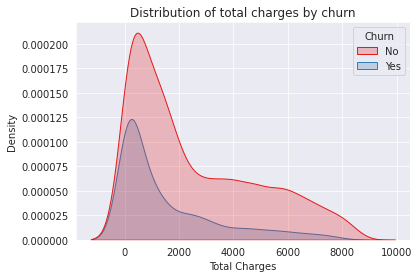

In [31]:
sns.set_style("darkgrid")
sns.kdeplot(x="TotalCharges",data=df,palette="Set1",hue="Churn",shade=True)
sns.set(rc={'figure.figsize':(20,12)})
plt.ylabel('Density');
plt.xlabel('Total Charges');
plt.title('Distribution of total charges by churn');

<font color="green">
Both churn customers and retained customer have similar distribution with regard to total charges.

<font color="red">
3.12. Tenure - Churn Relationship:

In [32]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=900, height=700,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

<font color="green">
The figure shows that new customers tend to churn more than old customers. Therefore, new customers are risky group in terms of churn and needs more campaigns and attraction in order to retain them as customers in the future.

## 4. Data Preprocessing

In [33]:
df_latest.isnull().sum()

SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                 

In [34]:
df_latest["TotalCharges"].fillna(df_latest["TotalCharges"].mean(),inplace=True)
df_latest.isnull().sum() 
# We fill all the missing values with the mean of the column concerned

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

<font color="green">
We will use df_latest because we transformed all of the values into numerical values,but as we can see above TotalCharges column has some 11 missing values that we have to fill or drop before applying the algorithm

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df_latest["Churn"]=encoder.fit_transform(df_latest["Churn"])
df_latest.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


<font color="green">
We also need to standardize some of columns(MonthlyCharges, TotalCharges, tenure) in order to make all columns make impact similar on the ML algorithm:

<font color="green">
Now our non standartized columns(3 columns) have been transformed 

In [36]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_latest[["MonthlyCharges","TotalCharges","tenure"]]= ss.fit_transform(df_latest[["MonthlyCharges","TotalCharges","tenure"]])
df_latest.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994971,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,0.066327,-0.259629,-0.173876,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,-1.236724,-0.362660,-0.960399,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [37]:
# We drop target column from data, so rest of the columns become features automatically
y = df_latest["Churn"] # represents the target column
X = df_latest.drop("Churn",axis=1) # X represents all the features

In [39]:
#Now we will split data into train set and some for test set in order to measure performance of the algorithms
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.05,random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6690, 30)
(6690,)
(353, 30)
(353,)


## 5. Training Machine Learning Models and Model Performance Evaluation

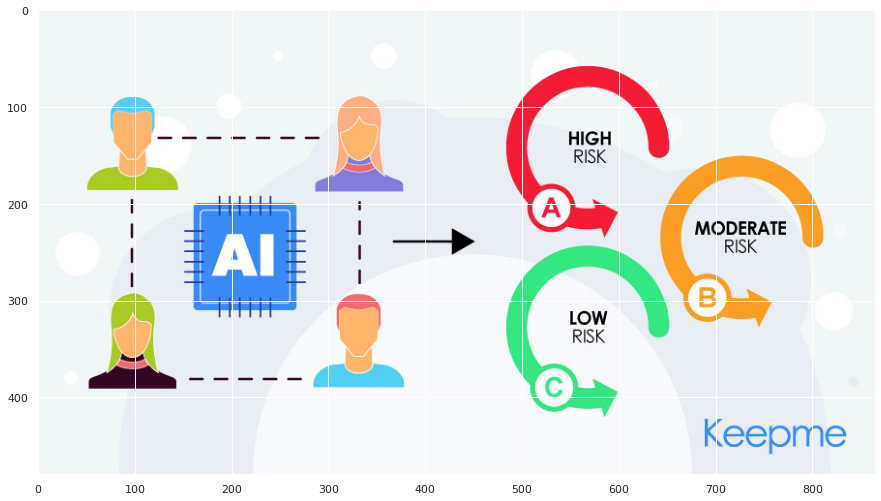

In [40]:
plt.figure(figsize=(15,12))
plt.imshow(plt.imread("../input/customer2/customer2.jpg"))

<font color="red">
5.1. Ensemble Learning 1 - Random Forest Classifier:

In [41]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

<font color="green">
We will make random grid search in order to find out best hyperparameter for random forest model

In [42]:
#Choosing best hyperparameters:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [43]:
# Create the random grid for these hyperparameters:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [44]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [45]:
random_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   6.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [46]:
print(random_grid.best_params_)
print(random_grid.best_score_)

{'n_estimators': 900, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 10}
0.804932735426009


In [47]:
predictions = random_grid.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[244  20]
 [ 50  39]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       264
           1       0.66      0.44      0.53        89

    accuracy                           0.80       353
   macro avg       0.75      0.68      0.70       353
weighted avg       0.79      0.80      0.79       353

0.8016997167138811


<font color="red">
5.2. K Neighbors Classifier:

In [49]:
from sklearn.neighbors import KNeighborsClassifier

<font color="green">
Instead of using different k_neigbors values which will be time consuming, we can use a for loop in order to choose the best k.

In [50]:
error_rate=list()
#here we iterate meny different k values and plot their error rates 
#and discover which one is better than others and has the lowest error rate
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction_i=knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))

Text(0, 0.5, 'Error Rate')

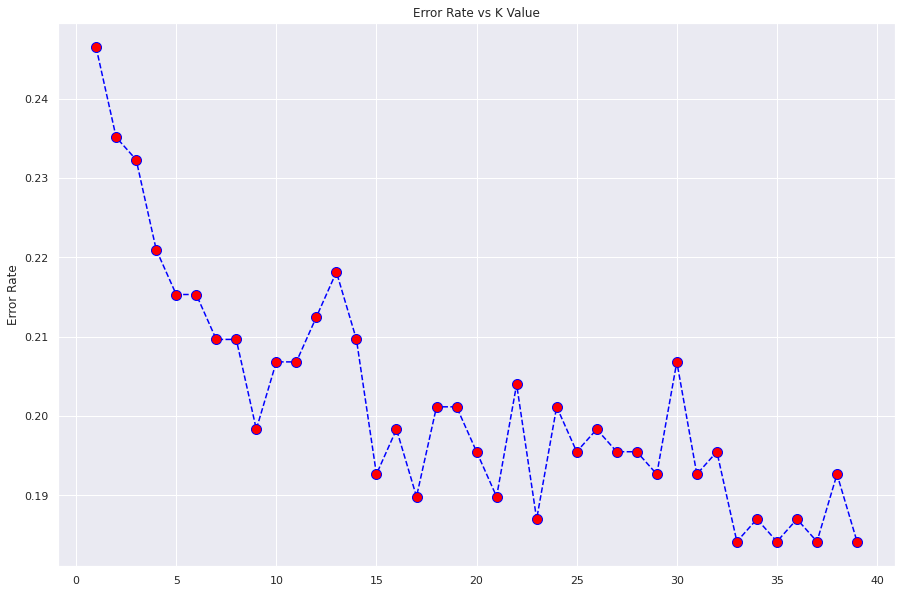

In [51]:
# Now we will plot the prediction error rates of different k values
plt.figure(figsize=(15,10))
plt.plot(range(1,40),error_rate, color="blue", linestyle="--",marker="o",markerfacecolor="red",markersize=10)
plt.title("Error Rate vs K Value")
plt.xlabel="K Value"
plt.ylabel("Error Rate")

<font color="green">
As we can see in the figure above, k=35 gives the least error rate,so we will use it for better predictions

In [52]:
knn=KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train, y_train)
predictions=knn.predict(X_test)

In [53]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
# we have almost the same preformance as we have in random forest

[[238  26]
 [ 39  50]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       264
           1       0.66      0.56      0.61        89

    accuracy                           0.82       353
   macro avg       0.76      0.73      0.74       353
weighted avg       0.81      0.82      0.81       353

0.8158640226628895


<font color="red">
5.3. Decision Tree:

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

<font color="green">
We do not wait a good performance from decision tree, but we can at least point out import features and which features have impact in formation of decision tree.

In [55]:
from sklearn import tree
print(tree.export_text(dtree))

|--- feature_1 <= -0.65
|   |--- feature_10 <= 0.50
|   |   |--- feature_1 <= -1.18
|   |   |   |--- feature_16 <= 0.50
|   |   |   |   |--- feature_2 <= -0.15
|   |   |   |   |   |--- feature_26 <= 0.50
|   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |--- feature_2 <= -1.34
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_2 >  -1.34
|   |   |   |   |   |   |   |   |--- feature_3 <= -0.97
|   |   |   |   |   |   |   |   |   |--- feature_3 <= -0.98
|   |   |   |   |   |   |   |   |   |   |--- feature_19 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   |   |   |   |--- feature_19 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- feature_3 >  -0.98
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= -1.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2

In [57]:
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[212  52]
 [ 45  44]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       264
           1       0.46      0.49      0.48        89

    accuracy                           0.73       353
   macro avg       0.64      0.65      0.64       353
weighted avg       0.73      0.73      0.73       353

0.7252124645892352


<font color="green">
As expected, the performance of decision tree is worse, but we understand from tree fromation that Feature 1(Tenure), Feature 10(InternetService_Fiber optic), Feature 3(Total Charges), Feature 20(Technical Support_Yes) and Feature 25(Contract_Two year) play very decisive role,so they are the most import features for churn or retention from the company.These insights comply with the our finding in the previous sections.

<font color="red">
5.4. Support Vector Machines:

<font color="green">
We will make a grid search in order to find out best hyper parameters to increse accuracy:

In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid={"C":[1,2,3,4,5,10,100],"gamma":[1,0.1,0.2,0.5,0.01,0.001,0.0001]} 
#here we select values for grid search to try
grid=GridSearchCV(SVC(),param_grid,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] C=1, gamma=1 ....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................................... C=1, gamma=1, total=   2.8s
[CV] C=1, gamma=1 ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV] ..................................... C=1, gamma=1, total=   2.8s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   2.9s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   2.6s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   2.8s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   1.6s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   1.6s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   1.5s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:  8.1min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 10, 100],
                         'gamma': [1, 0.1, 0.2, 0.5, 0.01, 0.001, 0.0001]},
             verbose=2)

In [59]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.2}
SVC(C=1, gamma=0.2)


In [60]:
grid_predictions=grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test, grid_predictions))
print(accuracy_score(y_test, grid_predictions))

[[241  23]
 [ 47  42]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       264
           1       0.65      0.47      0.55        89

    accuracy                           0.80       353
   macro avg       0.74      0.69      0.71       353
weighted avg       0.79      0.80      0.79       353

0.8016997167138811


<font color="red">
5.5. Ensemble Learning 2 - Voting Classifiers:

In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
clf1 = KNeighborsClassifier(n_neighbors=35)
clf2 = RandomForestClassifier(n_estimators= 900, min_samples_split = 5, min_samples_leaf = 5, max_depth = 10)
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('knc', clf1), ('rfc', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test, grid_predictions))
print(accuracy_score(y_test, grid_predictions))

Final Accuracy Score 
[[241  23]
 [ 47  42]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       264
           1       0.65      0.47      0.55        89

    accuracy                           0.80       353
   macro avg       0.74      0.69      0.71       353
weighted avg       0.79      0.80      0.79       353

0.8016997167138811


In [64]:
from sklearn.linear_model import LogisticRegression
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test, grid_predictions))
#This model has the highest score up til now with %82.7 accuracy

Final Accuracy Score 
0.8271954674220963
[[241  23]
 [ 47  42]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       264
           1       0.65      0.47      0.55        89

    accuracy                           0.80       353
   macro avg       0.74      0.69      0.71       353
weighted avg       0.79      0.80      0.79       353



<font color="red">
5.6. Ensemble Learning 3 - Pasting and Bagging:

<font color="green">
We will use another approach to get a diverse set of classifiers that uses the same training algorithm for every predictor and train them on different random subsets of the training set. When sampling is performed with replacement, this method is called bagging (short for bootstrap aggregating ). When sampling is performed without replacement, it is called pasting.

In [66]:
from sklearn.ensemble import BaggingClassifier
pasting_clf = BaggingClassifier(
RandomForestClassifier(), n_estimators=900,
max_samples=100, bootstrap=False, n_jobs=-1)
pasting_clf.fit(X_train, y_train)
predictions = pasting_clf.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
#We try pasting first as follows:

[[245  19]
 [ 53  36]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       264
           1       0.65      0.40      0.50        89

    accuracy                           0.80       353
   macro avg       0.74      0.67      0.69       353
weighted avg       0.78      0.80      0.78       353

0.7960339943342776


In [67]:
#Here we try Bagging:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(
RandomForestClassifier(), n_estimators=500,
max_samples=100, bootstrap=True, n_jobs=-1)
bagging_clf.fit(X_train, y_train)
predictions = bagging_clf.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[245  19]
 [ 53  36]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       264
           1       0.65      0.40      0.50        89

    accuracy                           0.80       353
   macro avg       0.74      0.67      0.69       353
weighted avg       0.78      0.80      0.78       353

0.7960339943342776


In [68]:
# We use Support Vector Machines instead of Random Forest
bagging_clf2= BaggingClassifier(SVC(kernel='rbf',C=1, gamma= 0.1, probability=True),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1)
bagging_clf2.fit(X_train,y_train)
predictions = bagging_clf2.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[248  16]
 [ 56  33]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       264
           1       0.67      0.37      0.48        89

    accuracy                           0.80       353
   macro avg       0.74      0.66      0.68       353
weighted avg       0.78      0.80      0.77       353

0.7960339943342776


<font color="red">
5.7. Ensemble Learning 4 - XGBoost:

In [69]:
import xgboost
from sklearn.metrics import log_loss
xgb = xgboost.XGBClassifier(learning_rate=0.1,
                                max_depth=20,
                                min_child_weight=30,
                                n_estimators=20)
xgb.fit(X_train, y_train)
eval_set=[(X_test, y_test)]
predictions = xgb.predict(X_test)
print(log_loss(y_test, predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
#This has the second best result among different algorithms

[23:52:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
6.359878915623876
[[243  21]
 [ 44  45]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       264
           1       0.68      0.51      0.58        89

    accuracy                           0.82       353
   macro avg       0.76      0.71      0.73       353
weighted avg       0.81      0.82      0.81       353

0.8158640226628895


<font color="red">
5.8. Aritifial Neural Networks:

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
ann = Sequential()
ann.add(Dense(units = 200,activation="relu", kernel_regularizer=l2(0.001)))
ann.add(Dropout(0.2))
ann.add(Dense(units = 100, activation="relu",kernel_regularizer=l2(0.001)))
ann.add(Dropout(0.2))
ann.add(Dense(units = 50, activation="relu",kernel_regularizer=l2(0.001)))
ann.add(Dense(1,activation="sigmoid")) 
ann.compile(optimizer = "adam", loss="binary_crossentropy",metrics=["accuracy"])
callback=EarlyStopping(monitor="val_loss", patience=2)
history = ann.fit(x = X_train, y= y_train, validation_data=(X_test,y_test), batch_size=16, epochs=100,callbacks=[callback])


Epoch 1/100
419/419 [==============================] - 2s 3ms/step - loss: 0.6655 - accuracy: 0.7599 - val_loss: 0.4688 - val_accuracy: 0.8130
Epoch 2/100
419/419 [==============================] - 1s 2ms/step - loss: 0.5075 - accuracy: 0.7970 - val_loss: 0.4336 - val_accuracy: 0.8215
Epoch 3/100
419/419 [==============================] - 1s 2ms/step - loss: 0.4692 - accuracy: 0.8007 - val_loss: 0.4155 - val_accuracy: 0.8215
Epoch 4/100
419/419 [==============================] - 1s 2ms/step - loss: 0.4673 - accuracy: 0.7953 - val_loss: 0.4023 - val_accuracy: 0.8272
Epoch 5/100
419/419 [==============================] - 1s 2ms/step - loss: 0.4498 - accuracy: 0.7989 - val_loss: 0.4083 - val_accuracy: 0.8300
Epoch 6/100
419/419 [==============================] - 1s 2ms/step - loss: 0.4453 - accuracy: 0.8061 - val_loss: 0.4162 - val_accuracy: 0.8357


<AxesSubplot:>

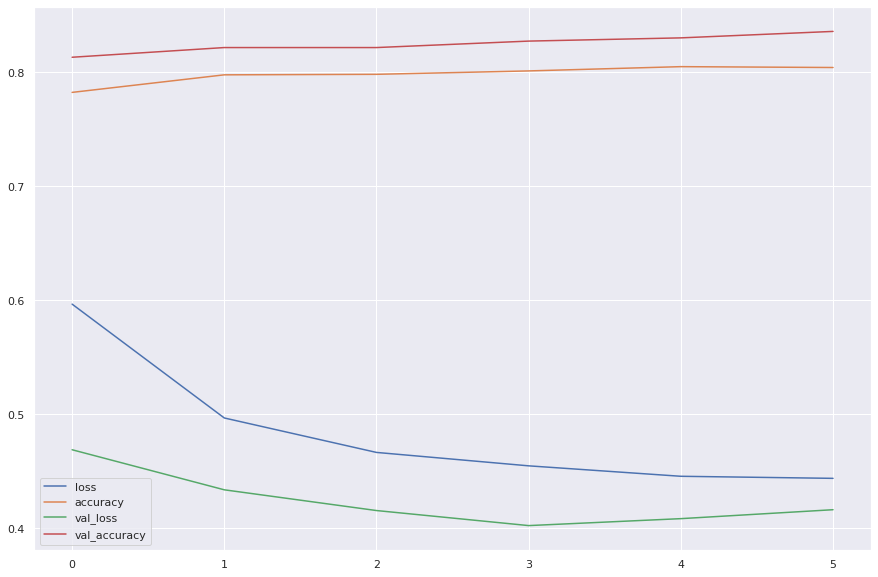

In [71]:
sns.set_style("darkgrid")
pd.DataFrame(ann.history.history).plot(figsize=(15,10))

In [72]:
predictions = ann.predict_classes(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[235  29]
 [ 29  60]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       264
           1       0.67      0.67      0.67        89

    accuracy                           0.84       353
   macro avg       0.78      0.78      0.78       353
weighted avg       0.84      0.84      0.84       353

0.8356940509915014


<font color="red">
Among all the model we have tried Artificial Neural Networks provide the best result with over % 83,6. The reason why we can not obtain more accuracy is that we have unbalanced data: Number of churn is lower than the retained : %26.5 versus % 73.5. With this unbalanced data, it is not good strategy to focus on getting better machine learning algorithm. Instead, we should focus on to try to train machine learning algorithms with balanced data samples.

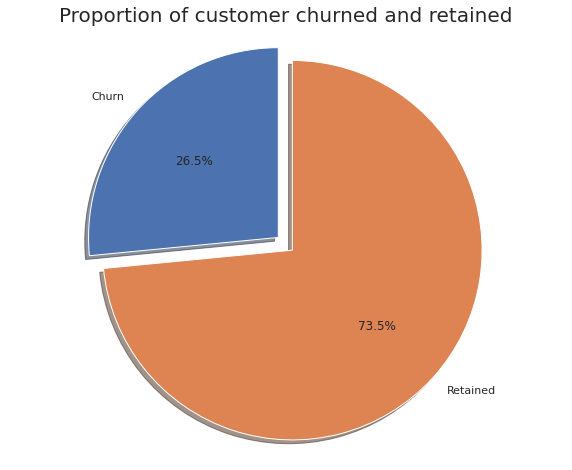

In [73]:
labels = 'Churn', 'Retained'
sizes = [df.Churn[df["Churn"]=="Yes"].count(), df.Churn[df["Churn"]=="No"].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()